In [ ]:
install.packages(c("factoextra", "cluster", "dendextend", "ggplot2", "data.table", "tidyverse"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FactoMineR’, ‘ggpubr’




In [ ]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
library(ggplot2)
library(dplyr)
library(readr)
library(cluster)
library(factoextra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df <- read_csv("credit_card_clusters.csv")

Rows: 8950 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (18): BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLME...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
df$cluster <- as.factor(df$cluster)

In [ ]:
df_pca <- prcomp(df %>% select(-cluster), scale. = TRUE)
pca_df <- as.data.frame(df_pca$x[, 1:2])
pca_df$cluster <- df$cluster

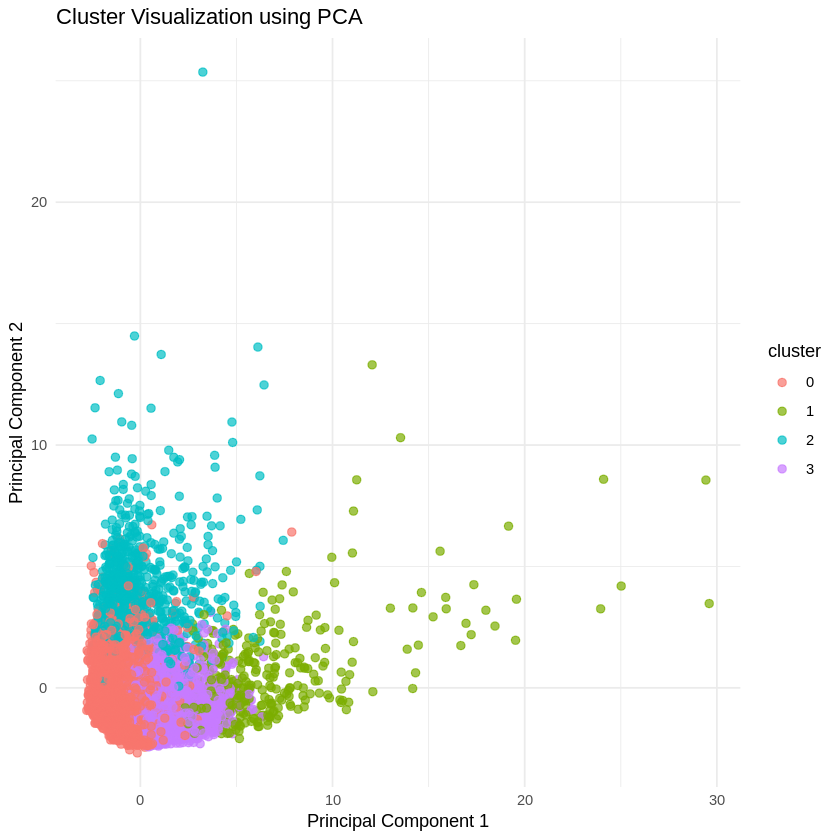

In [ ]:
ggplot(pca_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(alpha = 0.7, size = 2) +
  labs(title = "Cluster Visualization using PCA",
       x = "Principal Component 1",
       y = "Principal Component 2") +
  theme_minimal()

  cluster size ave.sil.width
1       1 4992          0.19
2       2  339         -0.08
3       3  889          0.07
4       4 2730          0.21


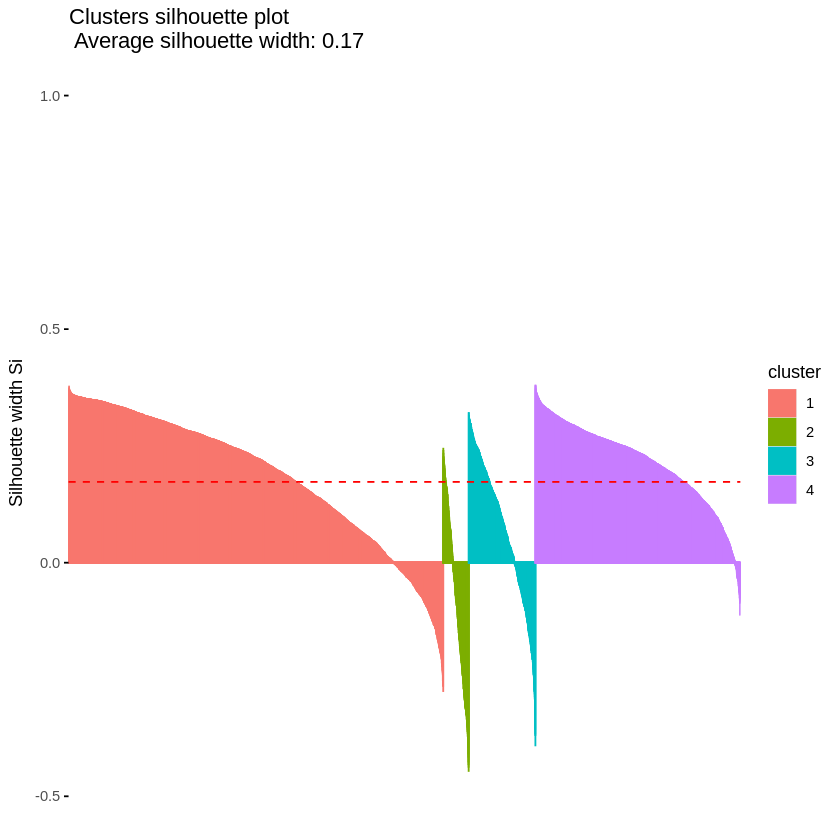

In [ ]:
df_scaled <- scale(df %>% select(-cluster))
sil <- silhouette(as.integer(df$cluster), dist(df_scaled))
fviz_silhouette(sil)

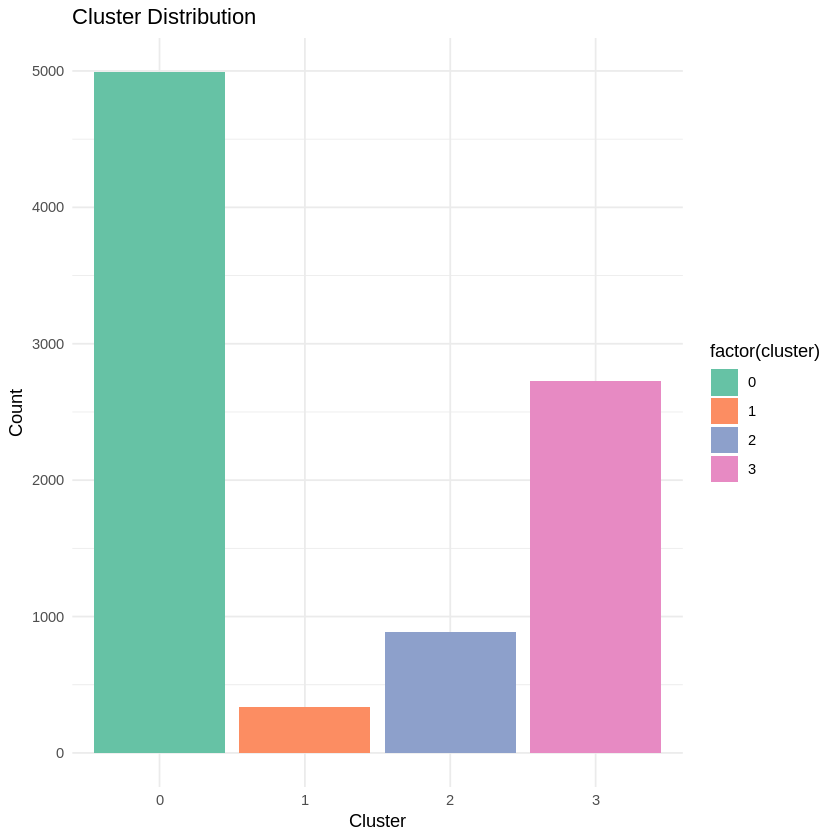

In [ ]:
ggplot(df, aes(x = cluster, fill = factor(cluster))) +
  geom_bar() +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Cluster Distribution", x = "Cluster", y = "Count") +
  theme_minimal()